In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Evaluating Classification Models: Metrics and Cross-Validation

We’ve trained a classification model, possibly one of the models we’ve discussed, like logistic regression, k-nearest neighbors, decision trees, or another you’re familiar with. The model makes predictions—but how good are those predictions? This is the key question, and answering it can be challenging.

We need a method to evaluate the model’s predictions.
This allows us to compare different models—like k-NN, logistic regression, decision trees—and choose the best one. It also helps us fine-tune hyperparameters to improve performance.

This is where model **evaluation metrics** come into play.
Scikit-learn provides a variety of these metrics, and we’ll explore several of the most important ones in this section.

Contents:

- [Train-Test Split](#1.-Train-Test-Split)
- [Evaluating a Classifier’s Performance](#2.-Evaluating-a-Classifier’s-Performance)
- [Cross Validation](#3.-Cross-validation)

## 1. Train-Test Split

We’ve trained a model, but the key question is: how well will it generalize to new, unseen data? Of course, we don’t have access to this unseen data right now. So, what can we do?
We need a method to estimate how well our model will perform on future data without actually having that data in hand.

Let’s load a dataset known as the Pima Indians Diabetes dataset. This dataset contains medical data from Pima Indian women. The goal is to predict whether or not a patient has diabetes based on several medical factors, such as age, blood pressure, and body mass index.

In [3]:
# load the Pima indian diabetes dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
df = pd.read_csv(path)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The Pima Indians Diabetes dataset comes from a study conducted by the National Institute of Diabetes and Digestive and Kidney Diseases. 
It focuses on the Pima Indian population, a group of Native Americans living in Arizona.
This group was chosen because they have a high prevalence of Type 2 diabetes.

The dataset contains medical information from 768 female patients of Pima Indian heritage, including factors like age, body mass index (BMI), blood pressure, and blood glucose concentration. The goal of the study was to identify factors that could predict the likelihood of diabetes onset.

| Column     | Description |
|------------|-------------|
| **pregnant** | Number of pregnancies the patient has had |
| **glucose**  | Plasma glucose concentration 2 hours after an oral glucose tolerance test |
| **bp**       | Diastolic blood pressure (mm Hg) |
| **skin**     | Triceps skin fold thickness (mm) |
| **insulin**  | 2-hour serum insulin (mu U/ml) |
| **bmi**      | Body mass index (weight in kg/(height in m)^2) |
| **pedigree** | Diabetes pedigree function (a measure of family history and genetic risk) |
| **age**      | Age of the patient (years) |
| **label**    | whether the patient has diabetes: 1 for diabetic and 0 for non-diabetic |

Each row represents a patient, and the label column indicates whether the patient has diabetes: 1 for diabetic and 0 for non-diabetic. Let’s now check how many patients in the dataset are classified as diabetic.

In [3]:
pima.label.value_counts() # 

0    500
1    268
Name: label, dtype: int64

Now, let’s build the feature matrix and the target vector. The feature matrix will contain all the input variables (e.g., glucose, blood pressure, BMI), while the target vector will hold the labels indicating whether each patient has diabetes (1) or not (0)

In [7]:
# feature matrix X, target vector y
X = df[feature_cols]
y = df.label

To simulate "having unseen, new data", we use a **train-test split**. 
We divide the dataset into two parts: the **training set**, used to train the model, and the **test set**, used to evaluate its performance on unseen data.

Here’s how to do it with scikit-learn:

In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

With `test_size=0.2`, 20% of the data is set aside for testing.

Now, we will use a k-NN model to train on the training set and then predict the labels (diabetes) for the test set.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the k-NN model with 10 neighbors 
knn_clf = KNeighborsClassifier(n_neighbors=10)

# Fit the model on the training data
knn_clf.fit(X_train, y_train)

# Use the trained model to predict labels for the test set
y_test_pred = knn_clf.predict(X_test)

In [13]:
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [14]:
Now that we have the predictions, how good are they?

Object `they` not found.


## 2. Evaluating a Classifier’s Performance

To assess how well our model performed, we’ll use an **evaluation metric** to compare the actual labels (`y_test`) with the predicted labels (`y_test_pred`). 
Scikit-learn provides many evaluation metrics for this purpose. You can explore the full list on the [scikit-learn reference page](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

Let’s take a look at some of the most commonly used evaluation metrics.

### 2.1. Accuracy

**Accuracy** is a common evaluation metric that measures the proportion of correct predictions made by the model. 
It’s calculated as the number of correct predictions divided by the total number of predictions. In other words, accuracy tells us what percentage of the predictions were correct.

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.7272727272727273

It looks like about 72% of the predictions are correct.

### 2.2. Confusion matrix

The confusion matrix provides a more nuanced view of the model's predictions compared to simple accuracy.
It shows how often the model correctly or incorrectly classifies each class.

The matrix has four key components:

- **True Positives (TP)**: The number of times the model correctly predicted the positive class (label 1).
- **True Negatives (TN)**: The number of times the model correctly predicted the negative class (label 0).
- **False Positives (FP)**: The number of times the model incorrectly predicted the positive class (also known as a "Type I error").
- **False Negatives (FN)**: The number of times the model incorrectly predicted the negative class (also known as a "Type II error").

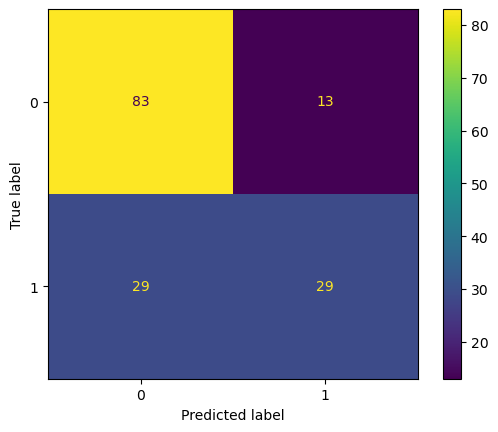

In [18]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_clf,X_test,y_test)

The confusion matrix shows the model’s performance:

- 83 True Negatives (TN): The model correctly predicted 83 non-diabetic patients.
- 13 False Positives (FP): The model incorrectly predicted 13 non-diabetic patients as diabetic.
- 29 False Negatives (FN): The model incorrectly predicted 29 diabetic patients as non-diabetic.
- 29 True Positives (TP): The model correctly predicted 29 diabetic patients.

In [20]:
# Generate the confusion matrix with just the numerical values
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[83, 13],
       [29, 29]], dtype=int64)

### 2.3. Metrics computed from the confusion matrix

Metrics like precision, recall, and F1-score are computed directly from the confusion matrix to provide deeper insights into model performance.

In [21]:
# Save the confusion matrix and extract its components
confusion = confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

**Recall** measures how often the model correctly predicts positive cases (label 
1) when the actual value is positive. It answers the question: "Out of all the actual positives, how many did the model correctly identify?"

The formula for recall is:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

In [22]:
TP/(TP+FN)

0.5

In [26]:
# using sklearn
from sklearn.metrics import recall_score
recall_score(y_test,y_test_pred)

0.5

**Precision** measures how often the model's positive predictions are correct. It answers the question: "Out of all the predicted positives, how many were actually positive?"

The formula for precision is:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

In [29]:
TP/(TP+FP)

0.6904761904761905

In [30]:
# using sklearn
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred)

0.6904761904761905

**Recall vs Precision**: Which metric should you focus on? 
The choice of metric depends on the specific goal of your model.
Here are some examples:
- Spam filter (positive class = "spam"): Focus on precision because false negatives (spam in the inbox) are less harmful than false positives (legitimate emails marked as spam).
- Fraud detection (positive class = "fraud"): Focus on recall (sensitivity) because missing a fraudulent transaction (false negative) is worse than flagging a legitimate one (false positive).


**F1 Score**  
The F1 score is the harmonic mean of precision and recall. 
It provides a balance between the two metrics and is particularly useful when you need a single measure that captures both false positives and false negatives.
The F1 score is best used when the class distribution is imbalanced, and you need to weigh both precision and recall equally.

The formula for the F1 score is:

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred)

0.58

### 2.4. Imbalanced datasets (optional)

 An **imbalanced dataset** is one where the classes are not represented equally. For example, in a dataset where 90% of the instances belong to one class and only 10% to the other, the model might become biased towards predicting the majority class. This can make accuracy misleading, as it doesn’t capture the model’s ability to correctly predict the minority class.

When dealing with imbalanced datasets, accuracy alone may not be enough to evaluate your model’s performance.
Here is an evaluation metric that you can use to get a better understanding of how well your model is performing:

**Balanced Accuracy**  
Balanced accuracy is the average of recall calculated separately for each class, making it a useful metric when dealing with imbalanced datasets. It ensures that the performance of both classes (positive and negative) is equally considered, avoiding bias toward the majority class.

The formula for balanced accuracy is:

$$
\text{Balanced Accuracy} = \frac{\text{Recall for Class 0} + \text{Recall for Class 1}}{2}
$$

In [33]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_test_pred)

0.6822916666666667

## 3. Cross-validation

Cross-validation is a more reliable way to evaluate your model compared to a simple train-test split. Why? Because with the train-test split, you're only testing the model on one part of the data. If that split isn’t representative, your results might not reflect how well the model actually performs.

With k-fold cross-validation, we split the data into $k$ equal parts (folds).
The model is trained on $k-1$ folds and tested on the remaining one. 
This process is repeated $k$ times, with each fold getting a chance to be the test set. 
At the end, you average the results, giving you a more reliable estimate of how well the model will perform on unseen data.

<td> <img src="cross_validation.png" alt="Drawing" style="width: 400px;"/> </td>

Here’s how to do it in scikit-learn.
In this example, we use 5-fold cross-validation to get five different accuracy scores, and then we take the average to get a better sense of how the model performs overall.

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Perform 5-fold cross-validation
scores = cross_val_score(knn_clf, X, y, cv=5)

# Print the accuracy for each fold 
scores

array([0.74675325, 0.72077922, 0.75974026, 0.78431373, 0.7124183 ])

In [35]:
# and the average score
scores.mean()

0.7448009506833035